<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/mechanics/answers-to-selected-assignments/Classical_Mechanics_Modeling_Coupled_Systems_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #6: Simulation of a Coupled Mechanical System 

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to 
'E90512_xxxx.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk and chanakatb@eng.pdn.ac.lk

* Submit the link at the end of 'Lesson on Rigid Body Motion'

* Upload the file through the Assignment Submission Link at the end of the Lesson.

# Setting up Python 

In [ ]:
import math
import numpy as np
from numpy import linalg
from scipy.integrate import odeint
import plotly.graph_objects as go

from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def Q3simu(X_0, Parem, dT, tsampl):
    X_n = X_0
    X_n = np.array(X_n)
    X_n = np.t
    #for i in range(tsampl):


  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None, {"frame": {"duration": 10},"mode": "immediate","fromcurrent": True, "transition": {"duration": 10, "easing": "linear"},}]
                                            )])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

# Problem Stement

Consider a bead of mass $m$ constrained to move as shown in the figure below. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). 

Let the radius of the disk be denoted by $r$, the thickness by $h$, the length of the slot by $2l$, the width of the slot by $2b$, and the density of the material by $\rho$.

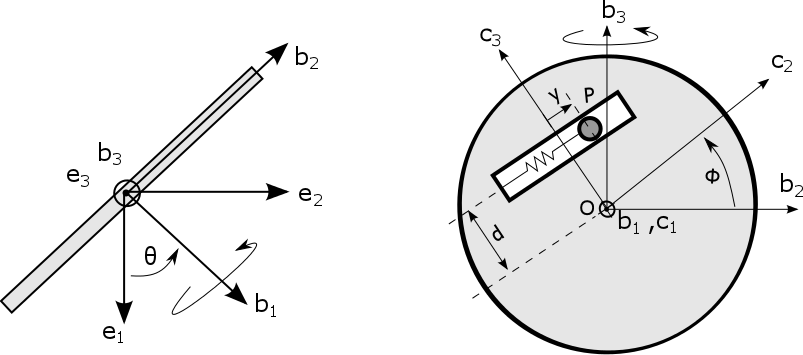

# Q#1 A collection of Rigid Bodies

Consider a set of $n$ number of rigid bodies. For each body $i^{\mathrm{th}}$ let the total mass be $M_i$, the center of mass be  $\bar{X}_i$ with respect to some frame $\mathbf{b}$ and let $\mathbb{I}_{c_i}$ be the moment of inertia of the the body $i$ about the center of mass of the body $i$ and with respect to a frame fixed at its center of mass and parallel to $\mathbf{b}$. Answer the following:

## Q#1.1 Find the representation of the center of mass $\bar{X}$ of the collection of bodies in the $\mathbf{b}$-frame. 

Let $M\triangleq \sum_{i}M_i$. Then
\begin{align}
\bar{X}&\triangleq \frac{\sum_{i}M_iX_i}{\sum_{i}M_i}
\end{align}

##Q#1.2 Prove the generalized version of the parallel axis theorem:

\begin{align}
\mathbb{I}&=\sum_{i=1}^n\left(-M_i\widehat{\bar{X}_i}^2 +\mathbb{I}_{c_i}\right)
\end{align}

When we set $i=1$ we get the parallel axis theorem.

Sample proof:
\begin{align}
\mathbb{I}&=\sum_{i=1}^n\sum_{j}-m_j\widehat{X}_j^2=\sum_{i=1}^n\sum_{j}-m_j\widehat{(\bar{X}_i+X_{{c_i}_j})}^2=\sum_{i=1}^n-M_i\widehat{\bar{X}_i}^2 +\mathbb{I}_{c_i}
\end{align}

##Q#1.3 Find a symbolic expression for the the center of mass of the disk shown in the figure above with respect to the frame $\mathbf{c}$. 

Denote by $\mathcal{B}_0$ the disk with the slot and denote its total mass by $M$. Let $\mathcal{B}_1$ denote a disk without the slot and $\mathcal{B}_2$ be an object that is identical to the slot and made out of the same material as the disk and located as the same as the slot. The total mass of each object is given by

\begin{align}
M_1&=\rho \pi r^2 h,\\
M_2&=4\rho lbh,\\
M&=M_1-M_2
\end{align}

Let $\bar{X}$ be the center of mass of the slotted disk in the frame $\mathbf{c}$. Then from the above expression we have:
\begin{align}
\frac{M\bar{X}+M_2\bar{X}_d}{M+M_2}=0
\end{align}
where $\bar{X}_d=[0\:\:\:0\:\:\:d]^T$. Thus
\begin{align}
\bar{X}&=-\frac{M_2}{M}\bar{X}_d
\end{align}

##Q#1.4 Find a symbolic expression for the moment of inertia of the slotted disk about the frame $\mathbf{c}$.

Let $\mathbb{I}_{c_1}$ be be the moment of inertia of the unslotted disk about its center of mass, $\mathbb{I}_{c_2}$ be be the moment of inertia of an object identical to the slot about its center of mass. They are definde with respect to frames parallel to frame $\mathbf{c}$. Let $\mathbb{I}$ be the moment of inertia of the slotted disk abot the frame $\mathbf{c}$. Then from the above expression we have
\begin{align}
\mathbb{I}_{c_1}&=\mathbb{I}+\mathbb{I}_{c_2}-M_2\widehat{\bar{X}}^2_d.
\end{align}
Thus
\begin{align}
\mathbb{I}&=\mathbb{I}_{c_1}-\mathbb{I}_{c_2}+M_2\widehat{\bar{X}}^2_d.
\end{align}

##Q#1.5 Find a symbolicexpression for the moment of inertia of the slotted disk about a frame fixed at its center of mass and parallel to $\mathbf{c}$.

\begin{align}
\mathbb{I}_c=\mathbb{I}+M\widehat{\bar{X}}^2
\end{align}

##Q#1.6 Write a Python function to compute the moment of inertia of a general slotted disk about its center of mass.
 

In [ ]:
def inertia_slotted_disk():
  m, M, r, h, l, b, d, rho=symbols('m, M, r, h, l, b, d, rho')
  hatd=np.array([[0,-d,0],[d,0,0],[0,0,0]]);
  M_1=rho*np.pi*r**2*h;
  M_2=4*rho*l*b*h
  M=M_1-M_2;
  barX=-(M_2/M)*Matrix([0,0,-d]);
  hatXbar=-(M_2/M)*Matrix([[0,-d,0],[d,0,0],[0,0,0]]);
  Ic1=Matrix([[M_1*r**2/2,0,0],[0,M_1*(3*r**2+h**2)/12,0],[0,0,M_1*(3*r**2+h**2)/12]])
  Ic2=Matrix([[M_2*(4*b**2+4*l**2)/12,0,0],[0,M_2*(4*b**2+h**2)/12,0],[0,0,M_2*(h**2+4*l**2)/12]])
  II=Ic1-Ic2+M_2*hatd@hatd*2;
  IIc=II+M*hatXbar@hatXbar;
  return [M,barX,II,IIc]

In [ ]:
[M,barX,II,IIc]=inertia_slotted_disk()

In [ ]:
II

In [ ]:
parameters={'rho':2710, 'r':0.1, 'h':0.01, 'd':0.05, 'b':0.01, 'l':0.08, 'g':10}

In [ ]:
print(II.subs(parameters))

Matrix([[0.00363536471228084, 0, 0], [0, 0.00169831045288311, 0], [0, 0, 0.00194979845288311]])


#Q#2 Write down the equations of motion for the bead plus disk coupled system

## Typical Answer

### Configuration and Angular Velocity

\begin{align}
\mathbf{b}&=\mathbf{e}\underbrace{\begin{bmatrix} \cos{\theta} &-\sin{\theta} &0\\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1
\end{bmatrix}}_{R_3(\theta)}\\
\mathbf{c}&=\mathbf{b}\underbrace{\begin{bmatrix} 1 & 0 & 0\\0 & \cos{\phi} &-\sin{\phi}\\
0 & \sin{\phi} & \cos{\phi}
\end{bmatrix}}_{R_1(\phi)}
\end{align}
Thus 
\begin{align}
\mathbf{c}&=\mathbf{b}R_1=\mathbf{e}\underbrace{R_3R_1}_{R}
\end{align}

Thus the angular velcoty is given by
\begin{align}
\widehat{\Omega}&=R^T\dot{R}=\widehat{\Omega}_1+R_1^T\widehat{\Omega}_3R_1
\end{align}
and hence
\begin{align}
{\Omega}&={\Omega}_1+R_1^T{\Omega}_3=\begin{bmatrix}\dot{\phi} \\ \dot{\theta}\sin{\phi} \\ \dot{\theta}\cos{\phi}
\end{bmatrix}
\end{align}

We consider the system as a coupled system. The bead and the disk. Below we will write down the Newton's equations for the two systems seperately.


### Newton's Equations of Motion for the Bead

Let the position of the center of mass of the bead be denoted by
\begin{align}
OP=\mathbf{e}\bar{x}_p=\mathbf{c}\underbrace{\begin{bmatrix} 0\\ y\\d
\end{bmatrix}}_{\bar{X}_p}=\mathbf{e}\,{R_3(\theta)R_1(\phi)}\,\bar{X}_p.
\end{align}

Assuming that the bead is a small spherical object of total mass $m$ we see that its center of mass motion is described in the $\mathbf{b}$ frame by the equations
\begin{align}
m\,R\left(\widehat{\Omega}^2\bar{X}_p +\widehat{\Omega}\dot{\bar{X}}_p+\dot{\widehat{\Omega}}\bar{X}_p+\ddot{\bar{X}}_p\right)&=  R F^e_p
\end{align}
Where $F^e$ is the representation of the external forces acting on the bead expressed in the moving $\mathbf{b}$ frame that is explicitly given by
\begin{align}
\mathbf{c}F^e_p=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{b}\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}
\end{align}

#### Symobolic computation of the equations of motion for the bead

In [ ]:
y, theta, phi = dynamicsymbols('y, theta, phi')
d, l, m, k, g, t, N_1, N_3, omega= symbols('d, l, m, k, g, t, N_1, N_3, omega')
init_vprinting()
R1_phi = Matrix([[1, 0, 0],[0, cos(phi), -sin(phi)],[0, sin(phi),cos(phi)]])
R3_theta = Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

In [ ]:
dy=y.diff('t');
ddy=dy.diff('t');
dtheta = theta.diff(t);
ddtheta=dtheta.diff('t');
dphi = phi.diff(t)
ddphi = dphi.diff(t)

In [ ]:
R=R3_theta@R1_phi;
Omega_3=Matrix([0,0,dtheta]);
Omega_1=Matrix([dphi,0,0]);
Omega=Omega_1+R1_phi.T@Omega_3;
hatOmega_3=Matrix([[0, -Omega_3[2], Omega_3[1]],[Omega_3[2],0,-Omega_3[0]],[-Omega_3[1],Omega_3[0],0]])
hatOmega_1=Matrix([[0, -Omega_1[2], Omega_1[1]],[Omega_1[2],0,-Omega_1[0]],[-Omega_1[1],Omega_1[0],0]])
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]])
dOmega_3=Matrix([0,0,ddtheta]);
dOmega_1=Matrix([ddphi,0,0]);
dOmega=dOmega_1+R1_phi.T@dOmega_3-hatOmega_1@R1_phi.T@Omega_3;
hatdOmega_3=Matrix([[0, -dOmega_3[2], dOmega_3[1]],[dOmega_3[2],0,-dOmega_3[0]],[-dOmega_3[1],dOmega_3[0],0]])
hatdOmega_1=Matrix([[0, -dOmega_1[2], dOmega_1[1]],[dOmega_1[2],0,-dOmega_1[0]],[-dOmega_1[1],dOmega_1[0],0]])
hatdOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
barX_p=Matrix([0,y,d]);
dbarX_p=Matrix([0,dy,0]);
ddbarX_p=Matrix([0,ddy,0]);
hatbarX_p=Matrix([[0, -barX_p[2], barX_p[1]],[barX_p[2],0,-barX_p[0]],[-barX_p[1],barX_p[0],0]]);
hatdbarX_p=Matrix([[0, -dbarX_p[2], dbarX_p[1]],[dbarX_p[2],0,-dbarX_p[0]],[-dbarX_p[1],dbarX_p[0],0]]);
hatddbarX_p=Matrix([[0, -ddbarX_p[2], ddbarX_p[1]],[ddbarX_p[2],0,-ddbarX_p[0]],[-ddbarX_p[1],ddbarX_p[0],0]]);
f_pg=Matrix([0,0,-m*g]);
F_p=Matrix([N_1,-k*y,N_3])+R1_phi.T@ f_pg;

In [ ]:
((hatbarX_p @ hatbarX_p)@Omega).norm()

sqrt(Abs((d**2 + y**2)*phi')**2 + Abs(d**2*sin(phi)*theta' - d*y*cos(phi)*theta')**2 + Abs(d*y*sin(phi)*theta' - y**2*cos(phi)*theta')**2)

In [ ]:
sqrt(((d**2 + {y}**2)*{dphi})**2 + (d**2*sin({phi})*{dtheta} - d*y*cos({phi})*{dtheta})**2 + (d*y*sin({phi})*{dtheta} - {y}**2*cos({phi})*{dtheta})**2)

In [ ]:
(((d**2+{y}**2)*{dphi})**2 +(d**2*sin({phi})*{dtheta}-d*{y}*cos({phi})*{dtheta})**2+(d*{y}*sin({phi})*{dtheta}-{y}**2*cos({phi})*{dtheta})**2)**(0.5)

In [ ]:
init_vprinting(pretty_print=False)

In [ ]:
beadEqn=simplify(m*(hatOmega@hatOmega@barX_p +2*hatOmega@dbarX_p+hatdOmega@barX_p+ddbarX_p)- F_p)

In [ ]:
beadEqn

⎡-N₁ + d⋅m⋅sin(φ)⋅θ̈ + 2⋅d⋅m⋅cos(φ)⋅φ̇⋅θ̇ + 2⋅m⋅y⋅sin(φ)⋅φ̇⋅θ̇ - m⋅y⋅cos(φ)⋅θ̈
⎢                                                                             
⎢                               ⎛            2                                
⎢                               ⎜d⋅sin(2⋅φ)⋅θ̇          ⎛   2     2    2⎞     
⎢          g⋅m⋅sin(φ) + k⋅y + m⋅⎜───────────── - d⋅φ̈ - ⎝cos (φ)⋅θ̇  + φ̇ ⎠⋅y 
⎢                               ⎝      2                                      
⎢                                                                             
⎢                            ⎛                                    2           
⎢                            ⎜    ⎛   2     2    2⎞   y⋅sin(2⋅φ)⋅θ̇           
⎢       -N₃ + g⋅m⋅cos(φ) + m⋅⎜- d⋅⎝sin (φ)⋅θ̇  + φ̇ ⎠ + ───────────── + y⋅φ̈ +
⎣                            ⎝                              2                 

 - 2⋅m⋅cos(φ)⋅θ̇⋅ẏ⎤
           ⎥
⎞          ⎥
 ⎟          ⎥
+ ÿ⎟          ⎥
⎠          ⎥
           ⎥
   ⎞       ⎥
    ⎟       ⎥

In [ ]:
eqddy_ddphi=beadEqn[1];

In [ ]:
eqN3=beadEqn[2]+N_3;

In [ ]:
eqN1=beadEqn[0]+N_1;

### Equations of motion for the disk

We see that in a moving frame $\mathbf{b}$ with the origin fixed with respect to the inertial frame $\mathbf{e}$  
\begin{align}
p&=M\dot{\bar{x}}_D=MR(\Omega\times \bar{X}_D),\\
\pi &=R\mathbb{I}_D\Omega,
\end{align}
where $\bar{X}_D$ is the representation of the center of mass of the disk in the  moving frame $\mathbf{b}$ and $\mathbb{I}_D$ is the moment of inertia tensor of the disk with respect to the disk fixed frame $\mathbf{b}$.

\begin{align}
p&=M_D\,R\widehat{\Omega}\bar{X}=M_D\dot{\bar{x}},\\
\pi&= R\mathbb{I}\Omega
\end{align}
and their derivatives are
\begin{align}
\dot{p}&=M_D\,R\left(\widehat{\Omega}^2\bar{X}_D +\dot{\widehat{\Omega}}\bar{X}\right)=  R F^e_D=f^e_D,\\
\dot{\pi}&=R\left(\mathbb{I}_D\dot{\Omega}-\mathbb{I}_D{\Omega}\times \Omega\right)=RT^e_D=\tau^e_D.
\end{align}
We see that the resultant of the external forces acting on the disk are given by

\begin{align}
\mathbf{c}F^e_D=\mathbf{c}\underbrace{\begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}}_{F_{b_1}}+\mathbf{c}\underbrace{\begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}}_{F_{b_2}}+\mathbf{c}\underbrace{\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}}_{F_{b_3}}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}}_{f_g}
\end{align}
and the reultant moments about the pivot point are given by
\begin{align}
T^e_D&=\begin{bmatrix} 0\\ y\\d
\end{bmatrix}\times \begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}+\begin{bmatrix} 0\\ 0\\0
\end{bmatrix}\times \begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}+\begin{bmatrix} 0\\ -l\\d
\end{bmatrix}\times\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}+
\bar{X}_D\times R_1^T(\phi)\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}+\begin{bmatrix} 0\\ T_2\\T_3
\end{bmatrix}
\end{align}

### Rotational Constraint

From the configuration of the system we also see that the external moments about the disk around the $\mathbf{e}_3=\mathbf{b}_3$ axis is zero. Thus we also have the relationship:
\begin{align}
\begin{bmatrix}0\\0\\1\end{bmatrix}\cdot R_1(\phi)T^e_d=0
\end{align}

### Symbolic computation of equations of motion

In [ ]:
M, II_1, II_2, II_3, T_2, T_3=symbols('M, II_1, II_2, II_3, T_2, T_3');
II=Matrix([[II_1,0,0],[0,II_2,0],[0,0,II_3]]);
f_Dg=Matrix([0,0,-M*g])
F_p=Matrix([N_1,-k*y,N_3])+R1_phi.T@ f_pg;
F_D1=Matrix([-N_1,0,-N_3]);
F_D2=Matrix([0,k*y,0]);
X2=Matrix([0,-l,d]);
hatbarX=Matrix([[0, -barX[2], barX[1]],[barX[2],0,-barX[0]],[-barX[1],barX[0],0]]);
hatX2=Matrix([[0, -X2[2], X2[1]],[X2[2],0,-X2[0]],[-X2[1],X2[0],0]]);
Tc=Matrix([0,T_2,T_3]);
T_D=simplify(hatbarX_p @ F_D1+hatX2 @ F_D2+hatbarX@R1_phi.T@f_Dg+Tc);

In [ ]:
diskEqn=simplify((II@dOmega+hatOmega@II@Omega))-T_D

In [ ]:
diskEqn

⎡                      2                 2                                   ⎛
⎢        II₂⋅sin(2⋅φ)⋅θ̇    II₃⋅sin(2⋅φ)⋅θ̇    4⋅M⋅b⋅d⋅g⋅l⋅sin(φ) + (N₃ + d⋅k)
⎢II₁⋅φ̈ - ─────────────── + ─────────────── + ────────────────────────────────
⎢               2                 2                                           
⎢                                                              4⋅b⋅l - 3.14159
⎢                                                                             
⎢                 II₁⋅cos(φ)⋅φ̇⋅θ̇ + II₂⋅(sin(φ)⋅θ̈ + cos(φ)⋅φ̇⋅θ̇) - II₃⋅cos(
⎢                                                                             
⎣                -II₁⋅sin(φ)⋅φ̇⋅θ̇ + II₂⋅sin(φ)⋅φ̇⋅θ̇ - II₃⋅(sin(φ)⋅φ̇⋅θ̇ - co

                          2⎞  ⎤
⋅⎝4⋅b⋅l - 3.14159265358979⋅r ⎠⋅y⎥
───────────────────────────────⎥
           2                  ⎥
265358979⋅r                   ⎥
                              ⎥
φ)⋅φ̇⋅θ̇ + N₁⋅d - T₂                 ⎥
                              ⎥
s(φ)⋅θ̈) - N₁⋅y - T₃  

#### Condition that the external moments about the $\mathbf{b}_3$ axis is zero

In [ ]:
simplify(R1_phi@T_D)[2]

In [ ]:
eqddtheta=simplify(diskEqn[1]*sin(phi)+diskEqn[2]*cos(phi)+simplify(R1_phi@T_D)[2])

NameError: ignored

In [ ]:
eqddtheta

In [ ]:
print(eqddtheta)

In [ ]:
eqddphi=diskEqn[0].subs({'N_3':eqN3})

In [ ]:
eqddy_ddphi

#### Simulations

In [ ]:
def beadInDiskSystemModelV2(X, t, parameters):
  y=X[0]; dy=X[1]; phi=X[2]; dphi=X[3]; theta=X[4]; dtheta=X[5]
  [M,barX,I,Ic]=inertia_slotted_disk();
  II=I.subs(parameters);
  II_1=II[0,0]; II_2=II[1,1]; II_3=II[2,2];
  ddphi=(-g*(M*l*d*np.sin(phi)+m*y*np.cos(phi))-k*d*y+0.5*(II_2-II_3)*np.sin(2*phi)*dtheta**2+m*d*y*((np.sin(phi))**2*dtheta**2+dphi**2)-0.5*m*y**2*np.sin(2*phi)*dtheta**2-2*m*y*dphi*dy)/(II_1+m*y**2);
  ddtheta=(II_3-II_2)*np.sin(2*phi)*dphi*dtheta/(II_2*(np.sin(phi))**2+II_3*(np.cos(phi))**2);
  ddy=-m*g*np.sin(phi)-k*y+m*y*((np.sin(phi))**2*dtheta**2+dphi**2)-0.5*m*d*np.sin(2*phi)*dtheta**2+m*ddphi;

  dXdt=[dy, ddy.subs(parameters), dphi, ddphi.subs(parameters), dtheta, ddtheta.subs(parameters)];
  return dXdt

In [ ]:
md.simulateDySystem

In [ ]:
parameters={'rho':2710, 'r':0.1, 'h':0.01, 'd':0.05, 'b':0.005, 'l':0.04, 'g':10, 'k':4, 'm':0.01}
[t,sol,fig]=md.simulateDySystem(beadInDiskSystemModelV2, 10,0.02, [1.5,0,0,0.2,0,0.2], parameters, 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]; phi=sol[i][2]; theta=sol[i][4];
  R3=np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
  R1=np.array([[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),-np.cos(phi)]])
  R=R3 @ R1;
  XX[i,:]=R @ [0,y,parameters['d']];

In [ ]:
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion in the e-frame')

# Bead in a 2D Disk V1

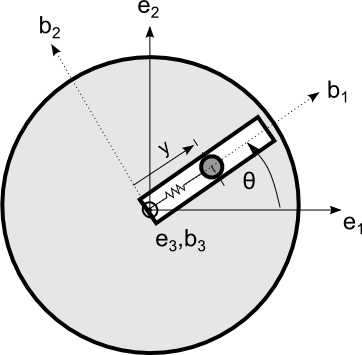

In [ ]:
y, theta= dynamicsymbols('y, theta');
y_0, m, k, g, t, N_1, N_2, N_3, T_1, T_2, T_3, M, II_1, II_2, II_3= symbols('y_0, m, k, g, t, N_1, N_2, N_3, T_1, T_2, T_3, M, II_1, II_2, II_3')
init_vprinting()
R3_theta = Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
dy=y.diff('t');
ddy=dy.diff('t');
dtheta = theta.diff(t);
ddtheta=dtheta.diff('t');

In [ ]:
II=Matrix([[II_1,0,0],[0,II_2,0],[0,0,II_3]]);
R=R3_theta;
Omega=Matrix([0,0,dtheta]);
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]])
dOmega=Matrix([0,0,ddtheta]);
hatdOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
barX_p=Matrix([y,0,0]);
dbarX_p=Matrix([dy,0,0]);
ddbarX_p=Matrix([ddy,0,0]);
hatbarX_p=Matrix([[0, -barX_p[2], barX_p[1]],[barX_p[2],0,-barX_p[0]],[-barX_p[1],barX_p[0],0]]);
hatdbarX_p=Matrix([[0, -dbarX_p[2], dbarX_p[1]],[dbarX_p[2],0,-dbarX_p[0]],[-dbarX_p[1],dbarX_p[0],0]]);
hatddbarX_p=Matrix([[0, -ddbarX_p[2], ddbarX_p[1]],[ddbarX_p[2],0,-ddbarX_p[0]],[-ddbarX_p[1],ddbarX_p[0],0]]);
f_pg=Matrix([0,0,-m*g]);
F_p=Matrix([-k*(y-y_0),N_2,N_3])+f_pg;

In [ ]:
beadEqn=simplify(m*(hatOmega@hatOmega@barX_p +2*hatOmega@dbarX_p+hatdOmega@barX_p+ddbarX_p)- F_p)

In [ ]:
beadEqn

⎡                ⎛   2    ⎞⎤
⎢-k⋅(y₀ - y) - m⋅⎝y⋅θ̇  - ÿ⎠⎥
⎢                          ⎥
⎢  -N₂ + m⋅(y⋅θ̈ + 2⋅θ̇⋅ẏ)   ⎥
⎢                          ⎥
⎣        -N₃ + g⋅m         ⎦

In [ ]:
m*R@(hatbarX_p@(dbarX_p+hatOmega@barX_p))

⎡  0   ⎤
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢   2  ⎥
⎣m⋅y ⋅θ̇⎦

# Bead in a Rotating Disk V2

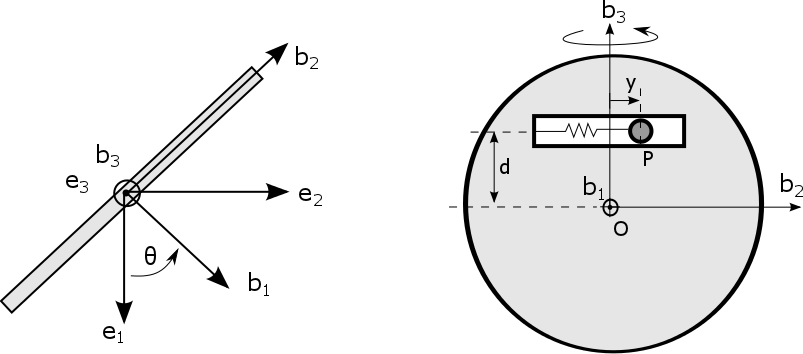

In [ ]:
y=dynamicsymbols('y');
d, m, k, g, t, omega, N_1, N_2, N_3, T_1, T_2, T_3, M, II_1, II_2, II_3= symbols('d, m, k, g, t, omega, N_1, N_2, N_3, T_1, T_2, T_3, M, II_1, II_2, II_3')
init_vprinting()
theta=cos(omega*t);
dtheta=-omega*sin(omega*t);
ddtheta=-omega**2*cos(omega*t);
R3_theta = Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
dy=y.diff('t');
ddy=dy.diff('t');

In [ ]:
II=Matrix([[II_1,0,0],[0,II_2,0],[0,0,II_3]]);
R=R3_theta;
Omega=Matrix([0,0,dtheta]);
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]])
dOmega=Matrix([0,0,ddtheta]);
hatdOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
barX_p=Matrix([0,y,d]);
dbarX_p=Matrix([0,dy,0]);
ddbarX_p=Matrix([0,ddy,0]);
hatbarX_p=Matrix([[0, -barX_p[2], barX_p[1]],[barX_p[2],0,-barX_p[0]],[-barX_p[1],barX_p[0],0]]);
hatdbarX_p=Matrix([[0, -dbarX_p[2], dbarX_p[1]],[dbarX_p[2],0,-dbarX_p[0]],[-dbarX_p[1],dbarX_p[0],0]]);
hatddbarX_p=Matrix([[0, -ddbarX_p[2], ddbarX_p[1]],[ddbarX_p[2],0,-ddbarX_p[0]],[-ddbarX_p[1],ddbarX_p[0],0]]);
f_pg=Matrix([0,0,-m*g]);
F_p=Matrix([N_1,-k*y,N_3])+f_pg;

In [ ]:
beadEqn=simplify(m*(hatOmega@hatOmega@barX_p +2*hatOmega@dbarX_p+hatdOmega@barX_p+ddbarX_p)- F_p)

In [ ]:
beadEqn

⎡-N₁ + m⋅ω⋅(ω⋅y⋅cos(ω⋅t) + 2⋅sin(ω⋅t)⋅ẏ)⎤
⎢                                       ⎥
⎢             ⎛ 2      2         ⎞      ⎥
⎢     k⋅y - m⋅⎝ω ⋅y⋅sin (ω⋅t) - ÿ⎠      ⎥
⎢                                       ⎥
⎣               -N₃ + g⋅m               ⎦

In [ ]:
print(beadEqn[0])

-N_1 + m*omega*(omega*y(t)*cos(omega*t) + 2*sin(omega*t)*Derivative(y(t), t))


In [ ]:
print(beadEqn[1])

k*y(t) - m*(omega**2*y(t)*sin(omega*t)**2 - Derivative(y(t), (t, 2)))


In [ ]:
print((m*(hatbarX_p@(dbarX_p+hatOmega@barX_p)))[1])

d*m*omega*y(t)*sin(omega*t)


# Q#6 Consider set of particles constrained to move as shown in the figure below. The mass of each of the identical particles fixed to the vertices is $m$. The set of particles are moving in space such that a  particles located at one of the vertices remain fixed. The particles are moving under the influence of gravity. Simulate the motion of the set of particles.

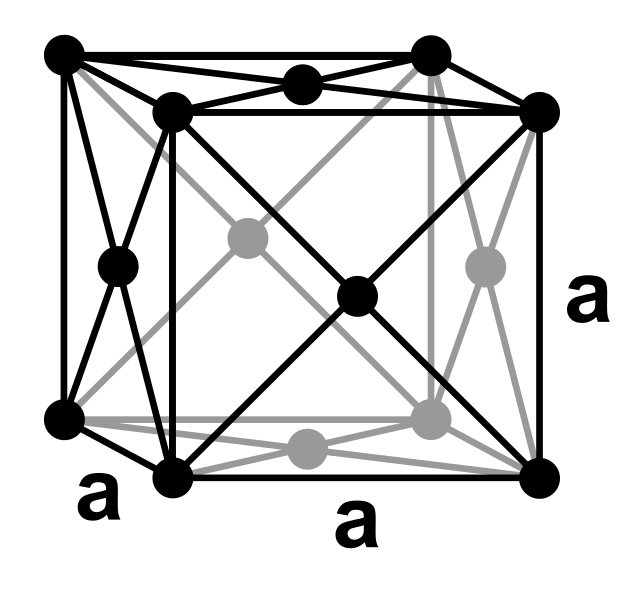

Let $\mathbf{b}$ be an inertial frame that is fixed to the pivot point of the object. Fix a frame $\mathbf{b}$ such that its origin is fixed at the pivot point and the axis align along the edges of the cube. Let $\mathbf{b}=\mathbf{e}R$.

In [ ]:
II=np.zeros((3,3))
for p in [0.,1.]:
  for q in [0.,1.]:
    for r in [0.,1.]:
      II+=-np.array([[0.,-r,q],[r,0.,-p],[-q,p,0.]])@np.array([[0.,-r,q],[r,0.,-p],[-q,p,0.]]);

from itertools import permutations
# Get all permutations of [0.5, 0.5, 0]
perm1 = permutations([0.5, 0.5, 0.])
perm2 = permutations([0.5, 0.5, 1.])
xx1=[]; xx2=[];
for i in list(perm1):
    xx1+=[i];
for zz in set(xx1):
  II+=-np.array([[0.,-zz[2],zz[1]],[zz[2],0.,-zz[0]],[-zz[1],zz[0],0.]])@np.array([[0.,-zz[2],zz[1]],[zz[2],0.,-zz[0]],[-zz[1],zz[0],0.]]);
for i in list(perm2):
    xx2+=[i];
for zz in set(xx2):
  II+=-np.array([[0.,-zz[2],zz[1]],[zz[2],0.,-zz[0]],[-zz[1],zz[0],0.]])@np.array([[0.,-zz[2],zz[1]],[zz[2],0.,-zz[0]],[-zz[1],zz[0],0.]]);

In [ ]:
lst=[1,2,3,3,4]

In [ ]:
set(lst)

{1, 2, 3, 4}

In [ ]:
linalg.eig(II)

(array([15.5,  5. , 15.5]), array([[ 0.81649658, -0.57735027, -0.4467196 ],
        [-0.40824829, -0.57735027, -0.36852803],
        [-0.40824829, -0.57735027,  0.81524763]]))

In [ ]:
xbarHat=np.array([[0.,-0.5,0.5],[0.5,0.,-0.5],[-0.5,0.5,0.]])

In [ ]:
IIc=II+14*xbarHat@xbarHat

In [ ]:
linalg.eig(IIc)

(array([0.75, 4.5 , 0.75]), array([[-0.81649658,  0.57735027,  0.52438651],
        [ 0.40824829,  0.57735027, -0.80419334],
        [ 0.40824829,  0.57735027,  0.27980683]]))

In [ ]:
m, a=symbols('m, a')

In [ ]:
Matrix(zeros(3))

In [ ]:
II=Matrix(zeros(3));
for p in [0,a]:
  for q in [0,a]:
    for r in [0,a]:
      II+=-np.array([[0,-r,q],[r,0,-p],[-q,p,0]])@np.array([[0,-r,q],[r,0,-p],[-q,p,0]]);

from itertools import permutations
# Get all permutations of [0.5, 0.5, 0]
perm = permutations([0.5*a, 0.5*a, 0])
xx=[]
for i in list(perm):
    xx+=[i]
for zz in set(xx):
  II+=-np.array([[0,-zz[2],zz[1]],[zz[2],0,-zz[0]],[-zz[1],zz[0],0]])@np.array([[0,-zz[2],zz[1]],[zz[2],0,-zz[0]],[-zz[1],zz[0],0]]);

In [ ]:
II

Matrix([
[  9.0*a**2, -2.25*a**2, -2.25*a**2],
[-2.25*a**2,   9.0*a**2, -2.25*a**2],
[-2.25*a**2, -2.25*a**2,   9.0*a**2]])

# Bead in a slotted Disk - Take 2

### Newton's Equations of Motion for the Bead

Let $\gamma_1=\begin{bmatrix} 1 & 0 & 0\end{bmatrix}$, $\gamma_2=\begin{bmatrix} 0 & 1 & 0\end{bmatrix}$, $\gamma_3=\begin{bmatrix} 0 & 0 & 1\end{bmatrix}$.

Also let the position of the center of mass of the bead be denoted by
\begin{align}
OP=\mathbf{e}\bar{x}_p=\mathbf{c}\underbrace{\begin{bmatrix} 0\\ y\\d
\end{bmatrix}}_{\bar{X}_p}=\mathbf{e}\,R\,\bar{X}_p.
\end{align}

Assuming that the bead is a small spherical object of total mass $m$ we see that its center of mass motion is described in the $\mathbf{b}$ frame by the equations
\begin{align}
m\ddot{\bar{X}}_p&= -m\left(\widehat{\Omega}^2\bar{X}_p +\widehat{\Omega}\dot{\bar{X}}_p+\dot{\widehat{\Omega}}\bar{X}_p\right)+ F^e_p
\end{align}
Where $F^e$ is the representation of the external forces acting on the bead expressed in the moving $\mathbf{b}$ frame that is explicitly given by
\begin{align}
F^e_p&=N_1 \gamma_1+N_3 \gamma_3-k(\gamma_2^TX_p)\, \gamma_2-mgR^T\gamma_3
\end{align}

We see that in a moving frame $\mathbf{b}$ with the origin fixed with respect to the inertial frame $\mathbf{e}$  
\begin{align}
\pi&= R\mathbb{I}\Omega
\end{align}
and their derivatives are
\begin{align}
\dot{\pi}&=R\left(\mathbb{I}_D\dot{\Omega}-\mathbb{I}_D{\Omega}\times \Omega\right)=RT^e_D=\tau^e_D.
\end{align}
We see that the resultant moments about the pivot point are given by
\begin{align}
T^e_D&=-N_1\widehat{\bar{X}}_p\gamma_1-N_3\widehat{\bar{X}}_p\gamma_3-kd(\gamma_2^T\bar{X}_p)\gamma_1-M_Dg\widehat{\bar{X}}_DR^T\gamma_3+T_2\gamma_2+T_3\gamma_3
\end{align}


From the configuration of the system we also see that the external moments about the disk around the $\mathbf{e}_3=\mathbf{b}_3$ axis is zero. Thus we also have the relationship:
\begin{align}
\gamma_3^T RT^e_d=0
\end{align}